In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("/home/xiaochen/kewen/IF_project")

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [1,7], [10000]*10)

number of examples with label '1': 6742
number of examples with label '7': 6265


In [7]:
target_path = 'outputs/mnist_good/Identity_mnist_devId_1_damp0.01_classOneAndSevenAll.json'

In [8]:
trainset_sampled[1][0]

In [9]:
os.path.abspath('.')

'/data/kewen/IF_project'

In [10]:
# JSON file
with open (target_path, "r") as f:
     data_target = json.loads(f.read())


In [11]:
data_target

{'helpful': [998,
  4387,
  4409,
  4677,
  6530,
  1821,
  2722,
  5381,
  392,
  4041,
  703,
  2717,
  4698,
  1608,
  5737,
  6684,
  4488,
  3319,
  268,
  582,
  5386,
  6367,
  6457,
  4780,
  4882,
  5621,
  3905,
  853,
  159,
  1132,
  4672,
  6604,
  5172,
  4784,
  4225,
  5690,
  448,
  4704,
  6463,
  4302,
  2649,
  792,
  636,
  2406,
  31,
  3012,
  4152,
  1195,
  2584,
  2959,
  4433,
  128,
  4121,
  410,
  4762,
  452,
  3828,
  3183,
  714,
  1049,
  1853,
  3952,
  3441,
  4772,
  840,
  190,
  2851,
  1518,
  4580,
  4936,
  1856,
  6014,
  6716,
  3618,
  5702,
  6255,
  585,
  6430,
  5520,
  3756,
  6162,
  1372,
  1283,
  3634,
  4525,
  2793,
  181,
  2744,
  1748,
  560,
  189,
  6426,
  1001,
  137,
  5566,
  461,
  1897,
  384,
  3590,
  6242,
  4091,
  2885,
  5047,
  1150,
  245,
  522,
  1307,
  806,
  5949,
  2444,
  3694,
  3486,
  2711,
  4316,
  5568,
  471,
  3320,
  6084,
  1326,
  2554,
  4653,
  2038,
  6598,
  5179,
  6681,
  4344,
  1366,
  

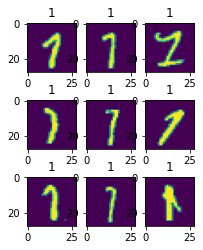

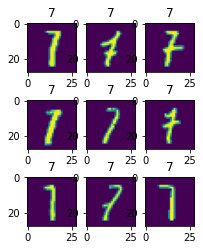

In [12]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['helpful'][i]][0])
    plt.title(trainset_sampled[data_target['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_target['harmful'][i]][0])
    plt.title(trainset_sampled[data_target['harmful'][i]][1])

In [14]:
# JSON file
groundTruthPath = 'outputs/mnist_good/Identity_mnist_devId_1_damp0.01_classOneAndSevenAll.json'
with open (groundTruthPath, "r") as f:
     data_groundtruth = json.loads(f.read())


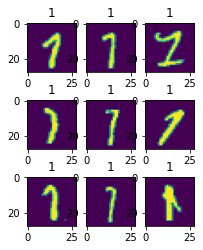

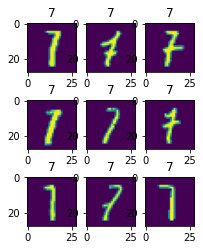

In [15]:
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['helpful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_groundtruth['harmful'][i]][0])
    plt.title(trainset_sampled[data_groundtruth['harmful'][i]][1])

In [16]:
y =  np.array(data_groundtruth['influence'])
x = np.array(data_target['influence'])*32
Correlation = round(np.corrcoef(x,y)[0,1],3)

Text(0.5, 1.0, 'correlation 1.0')

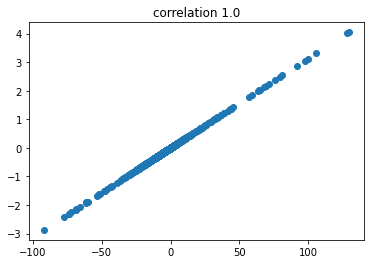

In [17]:
plt.scatter(x,y)
plt.title(f"correlation {Correlation}")

In [ ]:
x

In [ ]:
np.corrcoef(x,y)[0,1],3